In [ ]:
#try a logistic regression model on the flu data--the more cleaned-up version
#with the categorical variables encoded

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
#load the data from the cleaned-up .csv files made for the tree models
#separate data into two data frames: features and target. take out the respondent ids from both
df_flu_train_features_DT = pd.read_csv('./df_flu_train_clean_noNaNs_featuresonly.csv')
df_flu_train_target_DT = pd.read_csv('./df_flu_target_clean_noNaNs_seasonal.csv')

In [4]:
df_flu_train_features_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 19642 non-null  int64 
 1   h1n1_knowledge               19642 non-null  int64 
 2   behavioral_antiviral_meds    19642 non-null  int64 
 3   behavioral_avoidance         19642 non-null  int64 
 4   behavioral_face_mask         19642 non-null  int64 
 5   behavioral_wash_hands        19642 non-null  int64 
 6   behavioral_large_gatherings  19642 non-null  int64 
 7   behavioral_outside_home      19642 non-null  int64 
 8   behavioral_touch_face        19642 non-null  int64 
 9   doctor_recc_h1n1             19642 non-null  int64 
 10  doctor_recc_seasonal         19642 non-null  int64 
 11  chronic_med_condition        19642 non-null  int64 
 12  child_under_6_months         19642 non-null  int64 
 13  health_worker                19

In [5]:
df_flu_train_target_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   seasonal_vaccine  19642 non-null  int64
dtypes: int64(1)
memory usage: 153.6 KB


In [6]:
df_flu_train_features_DT.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,1,1,0,1,0,1,1,0,0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
3,2,1,0,1,0,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0
4,3,1,0,1,0,1,0,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3
5,0,0,0,0,0,0,0,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0
6,1,0,0,1,0,1,0,0,1,1,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2,0
7,0,2,0,1,0,1,1,1,1,0,...,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1,0
8,2,1,0,1,0,0,1,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0,0
9,2,1,0,1,0,1,1,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2,0


In [8]:
df_flu_train_target_DT.head(10)

,seasonal_vaccine
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,1


In [9]:
#get dummy variables for the categorical features. First make a copy of the data frame
df_flu_train_features_DT_1=df_flu_train_features_DT.copy()
pd.get_dummies(df_flu_train_features_DT_1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3,2,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,3,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,3,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
19638,2,2,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19639,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
19640,1,2,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [11]:
#Train-validation split of the data
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(df_flu_train_features_DT_1), df_flu_train_target_DT, 
                                                    test_size = 0.2, random_state=42)

In [24]:
#now run the logistic regression model
logit = LogisticRegression(C = .95, max_iter=120)
logit.fit(X_train, np.ravel(y_train))
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, np.ravel(y_train))))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, np.ravel(y_val))))

The score for logistic regression is
Training:  78.25%
Validation set:  78.54%


In [26]:
logit.predict_proba(X_val)

array([[0.9066823 , 0.0933177 ],
       [0.99187573, 0.00812427],
       [0.44185212, 0.55814788],
       ...,
       [0.88455877, 0.11544123],
       [0.19903898, 0.80096102],
       [0.56621289, 0.43378711]])

In [27]:
logit.predict_log_proba(X_val)

array([[-0.09796317, -2.37174547],
       [-0.00815745, -4.81289934],
       [-0.81678002, -0.58313133],
       ...,
       [-0.12266633, -2.15899367],
       [-1.61425459, -0.221943  ],
       [-0.56878515, -0.83520138]])

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns

In [33]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_val, logit.predict(X_val)))

Logistic Regression confusion matrix: 

 [[1645  389]
 [ 454 1441]]


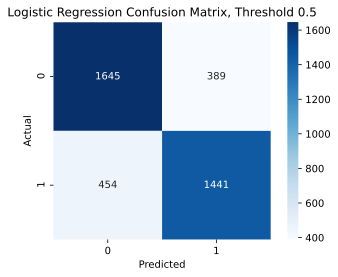

In [87]:
logit_confusion = confusion_matrix(y_true=y_val, y_pred=logit.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d"
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix, Threshold 0.5');

In [65]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = logit.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
#logit.precision_score(y_true=y_val, y_score=logit.predict(X_val))

Default threshold:
Precision: 0.7874,   Recall: 0.7604


In [71]:
#Try increasing the threshold, since we want precision to go up
y_predict = (logit.predict_proba(X_val)[:,1] > 0.7)
print("Threshold of 0.7:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Threshold of 0.7:
Precision: 0.8603,   Recall: 0.5588


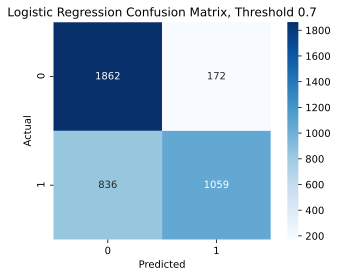

In [86]:
logit_confusion2 = confusion_matrix(y_true=y_val, y_pred=logit.predict_proba(X_val)[:,1] > 0.7)
plt.figure(dpi=150)
sns.heatmap(logit_confusion2, cmap=plt.cm.Blues, annot=True, square=True, fmt="d"
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix, Threshold 0.7');

In [77]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

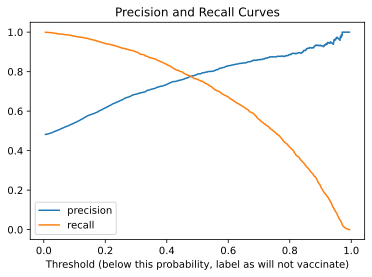

In [74]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, logit.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (below this probability, label as will not vaccinate)');
plt.title('Precision and Recall Curves');

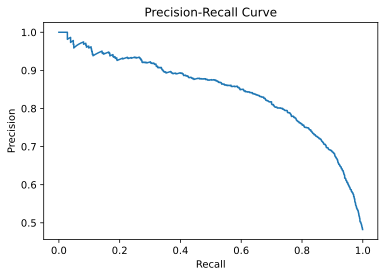

In [75]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [80]:
f1_score(y_val, logit.predict(X_val))

0.7736912751677852

In [81]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_val, logit.predict_proba(X_val)[:,1])

ROC AUC score =  0.8575885409775245


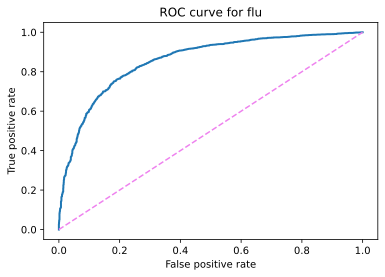

In [82]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for Seasonal Flu Vaccination');
print("ROC AUC score = ", roc_auc_score(y_val, logit.predict_proba(X_val)[:,1]))